## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  42.478963  1434.870204  0.253460   2.126280  1.312338
1  39.827684   147.795663  0.053913   8.022321  0.166096
2  28.089085  1391.934150  0.284914   7.013260  1.457494
3  11.833389   736.098903  0.518654  10.190474  1.534393
4  43.471782  1079.689572  0.006401   4.288067  0.099452


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.052   | train_mse: 3.15368 | train_mae: 1.37102 |  0:00:00s
epoch 1  | loss: 0.98455 | train_mse: 2.63032 | train_mae: 1.28461 |  0:00:00s
epoch 2  | loss: 0.63663 | train_mse: 2.49289 | train_mae: 1.17097 |  0:00:00s


epoch 3  | loss: 0.55474 | train_mse: 2.94038 | train_mae: 1.16258 |  0:00:00s
epoch 4  | loss: 0.55807 | train_mse: 3.08173 | train_mae: 1.19212 |  0:00:00s
epoch 5  | loss: 0.36876 | train_mse: 2.11722 | train_mae: 1.00866 |  0:00:00s


epoch 6  | loss: 0.39133 | train_mse: 1.96291 | train_mae: 0.93776 |  0:00:00s
epoch 7  | loss: 0.46027 | train_mse: 1.17313 | train_mae: 0.71555 |  0:00:00s


epoch 8  | loss: 0.35808 | train_mse: 1.17747 | train_mae: 0.7073  |  0:00:01s
epoch 9  | loss: 0.27195 | train_mse: 1.36789 | train_mae: 0.79149 |  0:00:01s


epoch 10 | loss: 0.3328  | train_mse: 1.36081 | train_mae: 0.77872 |  0:00:01s
epoch 11 | loss: 0.24478 | train_mse: 1.05277 | train_mae: 0.6949  |  0:00:01s


epoch 12 | loss: 0.2604  | train_mse: 0.81465 | train_mae: 0.62012 |  0:00:01s
epoch 13 | loss: 0.29302 | train_mse: 0.66737 | train_mae: 0.58615 |  0:00:01s

epoch 14 | loss: 0.21871 | train_mse: 0.63702 | train_mae: 0.57246 |  0:00:01s
epoch 15 | loss: 0.21705 | train_mse: 0.63729 | train_mae: 0.55956 |  0:00:02s


epoch 16 | loss: 0.2002  | train_mse: 0.53382 | train_mae: 0.5125  |  0:00:02s
epoch 17 | loss: 0.22621 | train_mse: 0.31548 | train_mae: 0.39894 |  0:00:02s


epoch 18 | loss: 0.28084 | train_mse: 0.30198 | train_mae: 0.39469 |  0:00:02s
epoch 19 | loss: 0.43532 | train_mse: 0.44006 | train_mae: 0.49035 |  0:00:02s


epoch 20 | loss: 0.21483 | train_mse: 0.43728 | train_mae: 0.4929  |  0:00:03s
epoch 21 | loss: 0.22241 | train_mse: 0.32466 | train_mae: 0.40485 |  0:00:03s


epoch 22 | loss: 0.23606 | train_mse: 0.33189 | train_mae: 0.40417 |  0:00:03s
epoch 23 | loss: 0.2995  | train_mse: 0.29373 | train_mae: 0.3917  |  0:00:03s


epoch 24 | loss: 0.1461  | train_mse: 0.32923 | train_mae: 0.42886 |  0:00:03s


epoch 25 | loss: 0.16921 | train_mse: 0.33761 | train_mae: 0.43144 |  0:00:03s
epoch 26 | loss: 0.13017 | train_mse: 0.29119 | train_mae: 0.36331 |  0:00:04s


epoch 27 | loss: 0.27139 | train_mse: 0.21937 | train_mae: 0.31097 |  0:00:04s
epoch 28 | loss: 0.15393 | train_mse: 0.18375 | train_mae: 0.31045 |  0:00:04s
epoch 29 | loss: 0.13519 | train_mse: 0.18687 | train_mae: 0.33814 |  0:00:04s


epoch 30 | loss: 0.14681 | train_mse: 0.16568 | train_mae: 0.30575 |  0:00:04s
epoch 31 | loss: 0.17664 | train_mse: 0.14756 | train_mae: 0.2754  |  0:00:04s
epoch 32 | loss: 0.30774 | train_mse: 0.19624 | train_mae: 0.31867 |  0:00:04s


epoch 33 | loss: 0.20957 | train_mse: 0.18198 | train_mae: 0.32066 |  0:00:04s
epoch 34 | loss: 0.22376 | train_mse: 0.1365  | train_mae: 0.28429 |  0:00:04s
epoch 35 | loss: 0.18495 | train_mse: 0.10812 | train_mae: 0.25047 |  0:00:05s


epoch 36 | loss: 0.22489 | train_mse: 0.10513 | train_mae: 0.24118 |  0:00:05s
epoch 37 | loss: 0.2848  | train_mse: 0.11833 | train_mae: 0.25451 |  0:00:05s
epoch 38 | loss: 0.17621 | train_mse: 0.15387 | train_mae: 0.30409 |  0:00:05s


epoch 39 | loss: 0.19202 | train_mse: 0.1403  | train_mae: 0.2916  |  0:00:05s
epoch 40 | loss: 0.28084 | train_mse: 0.20799 | train_mae: 0.33469 |  0:00:05s
epoch 41 | loss: 0.16562 | train_mse: 0.22563 | train_mae: 0.33984 |  0:00:05s


epoch 42 | loss: 0.10906 | train_mse: 0.2047  | train_mae: 0.29956 |  0:00:05s
epoch 43 | loss: 0.33515 | train_mse: 0.13894 | train_mae: 0.26673 |  0:00:05s
epoch 44 | loss: 0.11202 | train_mse: 0.15646 | train_mae: 0.29214 |  0:00:05s


epoch 45 | loss: 0.19744 | train_mse: 0.1464  | train_mae: 0.28157 |  0:00:05s
epoch 46 | loss: 0.19482 | train_mse: 0.14256 | train_mae: 0.28004 |  0:00:06s
epoch 47 | loss: 0.13621 | train_mse: 0.1416  | train_mae: 0.27076 |  0:00:06s


epoch 48 | loss: 0.12318 | train_mse: 0.12569 | train_mae: 0.2538  |  0:00:06s
epoch 49 | loss: 0.14425 | train_mse: 0.12937 | train_mae: 0.24489 |  0:00:06s
epoch 50 | loss: 0.13165 | train_mse: 0.12626 | train_mae: 0.25293 |  0:00:06s


epoch 51 | loss: 0.10134 | train_mse: 0.12351 | train_mae: 0.24418 |  0:00:06s
epoch 52 | loss: 0.1921  | train_mse: 0.09462 | train_mae: 0.22388 |  0:00:06s
epoch 53 | loss: 0.3263  | train_mse: 0.10037 | train_mae: 0.23347 |  0:00:06s


epoch 54 | loss: 0.15231 | train_mse: 0.10315 | train_mae: 0.22498 |  0:00:06s
epoch 55 | loss: 0.17357 | train_mse: 0.09662 | train_mae: 0.20588 |  0:00:06s
epoch 56 | loss: 0.1254  | train_mse: 0.06748 | train_mae: 0.18071 |  0:00:06s


epoch 57 | loss: 0.08714 | train_mse: 0.09071 | train_mae: 0.2134  |  0:00:06s
epoch 58 | loss: 0.18318 | train_mse: 0.10884 | train_mae: 0.23815 |  0:00:07s
epoch 59 | loss: 0.14266 | train_mse: 0.13658 | train_mae: 0.26484 |  0:00:07s


epoch 60 | loss: 0.14403 | train_mse: 0.09345 | train_mae: 0.23441 |  0:00:07s
epoch 61 | loss: 0.17099 | train_mse: 0.0846  | train_mae: 0.22688 |  0:00:07s
epoch 62 | loss: 0.12874 | train_mse: 0.06721 | train_mae: 0.19576 |  0:00:07s


epoch 63 | loss: 0.18792 | train_mse: 0.076   | train_mae: 0.20103 |  0:00:07s
epoch 64 | loss: 0.11896 | train_mse: 0.05968 | train_mae: 0.1824  |  0:00:07s
epoch 65 | loss: 0.10645 | train_mse: 0.0656  | train_mae: 0.19789 |  0:00:07s


epoch 66 | loss: 0.08475 | train_mse: 0.07964 | train_mae: 0.21642 |  0:00:07s
epoch 67 | loss: 0.10559 | train_mse: 0.08634 | train_mae: 0.22821 |  0:00:07s
epoch 68 | loss: 0.12694 | train_mse: 0.07276 | train_mae: 0.19425 |  0:00:07s


epoch 69 | loss: 0.07402 | train_mse: 0.07627 | train_mae: 0.20207 |  0:00:07s
epoch 70 | loss: 0.06481 | train_mse: 0.07259 | train_mae: 0.20383 |  0:00:08s
epoch 71 | loss: 0.15267 | train_mse: 0.0596  | train_mae: 0.18476 |  0:00:08s


epoch 72 | loss: 0.10113 | train_mse: 0.06395 | train_mae: 0.18313 |  0:00:08s
epoch 73 | loss: 0.16017 | train_mse: 0.06371 | train_mae: 0.18972 |  0:00:08s
epoch 74 | loss: 0.09568 | train_mse: 0.06037 | train_mae: 0.18812 |  0:00:08s


epoch 75 | loss: 0.09881 | train_mse: 0.06396 | train_mae: 0.19632 |  0:00:08s
epoch 76 | loss: 0.13997 | train_mse: 0.08069 | train_mae: 0.21255 |  0:00:08s
epoch 77 | loss: 0.13097 | train_mse: 0.07571 | train_mae: 0.20955 |  0:00:08s


epoch 78 | loss: 0.08934 | train_mse: 0.06503 | train_mae: 0.19372 |  0:00:08s
epoch 79 | loss: 0.1217  | train_mse: 0.06843 | train_mae: 0.19376 |  0:00:08s
epoch 80 | loss: 0.19622 | train_mse: 0.06607 | train_mae: 0.19193 |  0:00:08s


epoch 81 | loss: 0.12325 | train_mse: 0.07018 | train_mae: 0.19821 |  0:00:09s
epoch 82 | loss: 0.12559 | train_mse: 0.07982 | train_mae: 0.2123  |  0:00:09s
epoch 83 | loss: 0.06777 | train_mse: 0.08185 | train_mae: 0.21899 |  0:00:09s


epoch 84 | loss: 0.09235 | train_mse: 0.08341 | train_mae: 0.22371 |  0:00:09s
epoch 85 | loss: 0.11154 | train_mse: 0.06706 | train_mae: 0.20614 |  0:00:09s
epoch 86 | loss: 0.09808 | train_mse: 0.06338 | train_mae: 0.1903  |  0:00:09s


epoch 87 | loss: 0.11157 | train_mse: 0.06339 | train_mae: 0.183   |  0:00:09s
epoch 88 | loss: 0.09681 | train_mse: 0.06741 | train_mae: 0.19018 |  0:00:09s
epoch 89 | loss: 0.15717 | train_mse: 0.08124 | train_mae: 0.21322 |  0:00:09s


epoch 90 | loss: 0.12364 | train_mse: 0.07599 | train_mae: 0.21597 |  0:00:09s
epoch 91 | loss: 0.09433 | train_mse: 0.06792 | train_mae: 0.20395 |  0:00:09s
epoch 92 | loss: 0.1028  | train_mse: 0.0675  | train_mae: 0.19776 |  0:00:10s


epoch 93 | loss: 0.07064 | train_mse: 0.06559 | train_mae: 0.19777 |  0:00:10s
epoch 94 | loss: 0.08037 | train_mse: 0.06853 | train_mae: 0.20208 |  0:00:10s


epoch 95 | loss: 0.11694 | train_mse: 0.06774 | train_mae: 0.20449 |  0:00:10s
epoch 96 | loss: 0.17022 | train_mse: 0.07649 | train_mae: 0.2067  |  0:00:10s
epoch 97 | loss: 0.18786 | train_mse: 0.11236 | train_mae: 0.2245  |  0:00:10s


epoch 98 | loss: 0.14629 | train_mse: 0.11246 | train_mae: 0.22789 |  0:00:10s
epoch 99 | loss: 0.15377 | train_mse: 0.11378 | train_mae: 0.23606 |  0:00:10s
epoch 100| loss: 0.12515 | train_mse: 0.09087 | train_mae: 0.21785 |  0:00:10s


epoch 101| loss: 0.09606 | train_mse: 0.06273 | train_mae: 0.19192 |  0:00:10s
epoch 102| loss: 0.09998 | train_mse: 0.05482 | train_mae: 0.18107 |  0:00:11s


epoch 103| loss: 0.07298 | train_mse: 0.06379 | train_mae: 0.18839 |  0:00:11s
epoch 104| loss: 0.09379 | train_mse: 0.06962 | train_mae: 0.20264 |  0:00:11s
epoch 105| loss: 0.09331 | train_mse: 0.05288 | train_mae: 0.18217 |  0:00:11s


epoch 106| loss: 0.09118 | train_mse: 0.06081 | train_mae: 0.18652 |  0:00:11s

Early stopping occurred at epoch 106 with best_epoch = 56 and best_train_mae = 0.18071
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

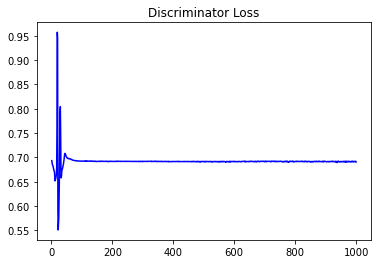

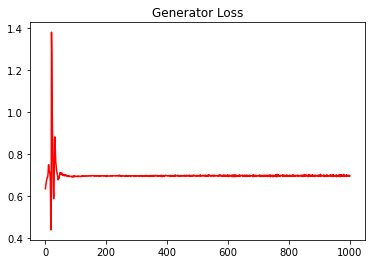

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.23729689989904396


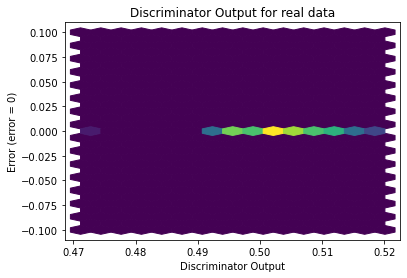

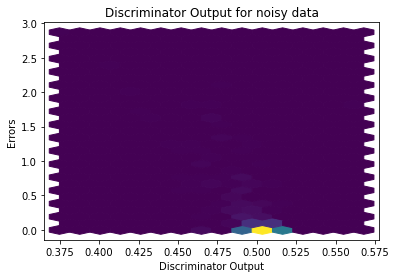

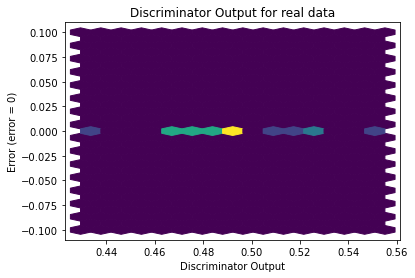

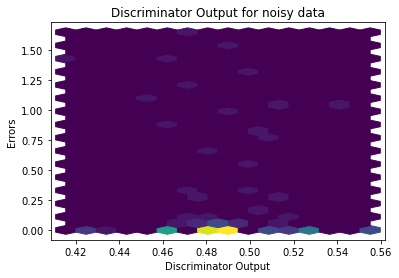

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


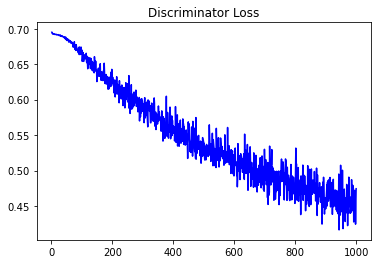

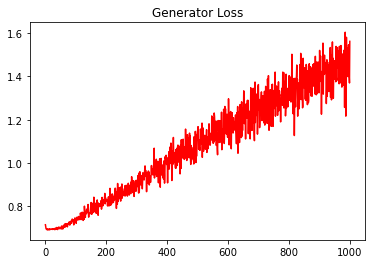

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1716156047259042


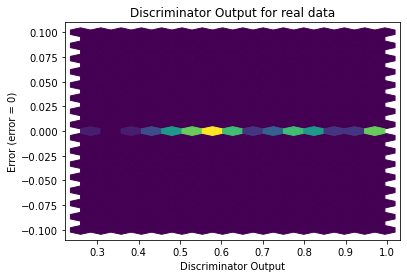

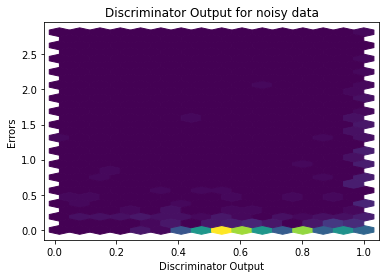

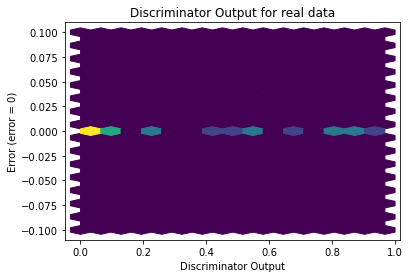

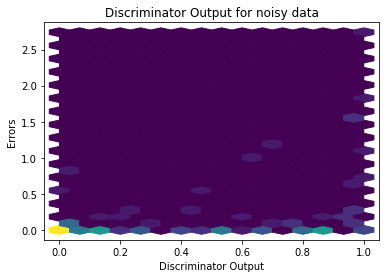

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
